## Sequences

A [sequence][1] is a (possibly infinite) set of numbers with a defined order.

$$
a_n = \frac{1}{n}, \textit{ for } n = 0, 1, 2, ...,
$$

[1]: http://www.synechism.org/wp/difference-equations-to-differential-equations/

## Difference Equations

A difference equation is a type of sequence. A difference equation expresses the value of the sequence relative to the value of another point in the sequence.

$$
x_{n+1} = 1.5x_n, \textit{ for } n = 0, 1, 2, ...,
$$

To evaluate this equation at $n=3$ we need to know the initial value $x_0$, and evalueate $n=1, 2, 3$ in succession. For example, if $x_0=100$:

\begin{align}
x_0 & && = 100 \\
x_1 & = 1.5 \times 100 && = 150\\
x_2 & = 1.5 \times 150 && = 225\\
x_3 & = 1.5 \times 225 && = 337.5
\end{align}

In the example above, we evaluate the equation recursively. It would be better to be able to evaluate the equation at $n = 100$ without performing $100$ calculations. Note that we can also write the equation above in this form:

$$
x_3 = 100 \times 1.5 \times 1.5 \times 1.5 = 337.5
$$

Solving a difference equation means writing the same equation such that it can be evaluated at a given $n$ without first evaluating $n=1,2,etc$. The solution to the equation above is:

$$
x_{n} = 1.5^{n} \times x_0, \textit{ for } n = 0, 1, 2, ...,
$$

## Second Order Difference Equations

The previous example is a **first order difference equation** because it expresses the value of $x_n$ as a function of  one other sample, $x_{n-1}$. A **second order difference equation** is a function of two other samples, for example

$$
x_{n+2} = 1.5x_n + 1.4x_{n+1}, \textit{ for } n = 0, 1, 2, ...,
$$


## Solve Difference Equations with Eigenvalues and Eigenvectors

A famous example is the Fibonacci Sequence. 

$$
F_k = 0, 1, 1, 2, 3, 5, 8, 13, ...
$$

Assume $F_0 = 0$ and $F_1 = 1$

$$
F_{k+2} = F_{k+1} + F_{k} \\
$$

We can solve the sequence with linear algebra. Let us start our sequence with a vector, $u_0=\begin{bmatrix}1\\0\end{bmatrix}$. We can find the next vector in our sequence, $u_1$ like this:

$$
u_{1} =
\begin{bmatrix}
1 && 1 \\
1 && 0
\end{bmatrix}
\begin{bmatrix}
1 \\ 0
\end{bmatrix} = 
\begin{bmatrix}
1 \\ 1
\end{bmatrix}
$$

More generally:

$$
u_{k+1} = 
\begin{bmatrix}
1 && 1 \\
1 && 0
\end{bmatrix}
u_k
$$

Note that $u_0$ contains $\begin{bmatrix}F_1\\F_0\end{bmatrix}$.

The key to solving the sequence is the eigenvalues and eigenvetors of $\begin{bmatrix}1&&1\\1&&0\end{bmatrix}$. We can write $u_3$ as 

$$
u_3 = 
\begin{bmatrix}1 && 1 \\ 1 && 0\end{bmatrix}
\begin{bmatrix}1 && 1 \\ 1 && 0\end{bmatrix}
\begin{bmatrix}1 && 1 \\ 1 && 0\end{bmatrix}
\begin{bmatrix}1 \\ 0\end{bmatrix} = 
\begin{bmatrix}3 \\ 2\end{bmatrix} = 
\begin{bmatrix}F_4 \\ F_3\end{bmatrix}
$$

In [84]:
import numpy as np
fib = np.matrix([[1,1],[1,0]])
u_0 = np.matrix([[1],[0]])

fib * fib * fib * u_0

matrix([[3],
        [2]])

The general case is:

$$
u_{k} = \begin{bmatrix}1 && 1 \\ 1 && 0\end{bmatrix}^k
\begin{bmatrix}1 \\ 0\end{bmatrix}
$$

We can use eigenvectors and eigenvalues to solve the matrix power (see [Eigenvalues and Eigenvectors](http://web.media.mit.edu/~holbrow/post/eigenvalues-and-eigenvectors/)). First, find the eigenvalues:

$$
\begin{align}
det\begin{vmatrix}
1 - \lambda & 1\\
1 & - \lambda
\end{vmatrix} & = 0\\
-\lambda(1-\lambda) - 1 & = 0\\
\lambda{}^2 - \lambda - 1 & = 0
\end{align}
$$

Solve using the quadratic formula $\frac{-b \pm \sqrt{b^2-4ac}}{2a} \implies \frac{1 \pm \sqrt{5}}{2} \approx \frac{1 \pm 2.236}{2}\\$, which gives the eigenvalues for our matrix:
$$
\begin{align}
\lambda_1 & \approx &1.618 \\
\lambda_2 & \approx &-0.618
\end{align}
$$

Now we plug our constants ($\lambda_1$ and $\lambda_2$) into the original matrix to find the eigen vectors.

$$
\begin{bmatrix}1-\lambda_1 & 1 \\ 1 & -\lambda_1 \end{bmatrix}\vec{x}_1 = 0 \implies \vec{x}_1 = \begin{bmatrix}\lambda_1 \\ 1\end{bmatrix}
$$

Note that this solution is not nessecarily intuitive. This is **not** a valid solution for *any* lambda. We can use the same process to solve for $\lambda_2$, revealing our eigenvectors, $\begin{bmatrix}\lambda_1 \\1\end{bmatrix}$ and $\begin{bmatrix}\lambda_2 \\1\end{bmatrix}$.

Populating the interactive namespace from numpy and matplotlib


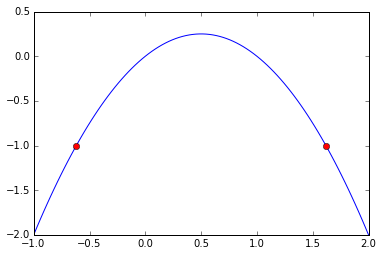

In [86]:
# show that x(1-x) + 1 = 0 for our two eigenvalues only
%pylab inline

def check(val): return val - (val*val)

x = np.linspace(-1, 2, 100)
y = [check(lbda) for lbda in x]

pylab.plot(x, y)

lambda_1 = (1 + np.sqrt(5))/2
lambda_2 = (1 - np.sqrt(5))/2

pylab.plot(lambda_1, check(lambda_1), 'ro')
pylab.plot(lambda_2, check(lambda_2), 'ro')

In [91]:
amt = 1/(lambda_1-lambda_2)
eig1 = np.matrix([[lambda_1], [1]])
eig2 = np.matrix([[lambda_2], [1]])

(eig1 + eig2) * amt

matrix([[ 0.4472136 ],
        [ 0.89442719]])

# Differential Equations

Remember: The derivative with respect to $t$ of $e^{\lambda{}t}$ is $\lambda{}e^{\lambda{}t}$